<h1>Dummy-muuttujien yhteenveto</h1>

Dummy-muuttujaksi (binäärinen, dikotominen) kutsutaan muuttujaa, joka saa arvokseen joko 0 (joskus tämän sijasta käytetään tyhjää solua) tai 1. 

Esimerkiksi kyselytutkimuksessa monivalintakysymys, jonka vaihtoehdoista vastaaja saa valita useammankin kuin yhden, koodataan dummy-muuttujiksi: Jokainen kysymyksen vaihtoehto on muuttuja, joka saa arvokseen 1, jos vastaaja on sen valinnut. Muussa tapauksessa arvo on 0 tai tyhjä.

Tärkeää! Usein valintakysymyksiä (saa valita vain yhden vaihtoehdon) kutsutaan virheellisesti monivalintakysymyksiksi. Valintakysmystä ei pidä koodata dummy-muuttujiksi!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

In [2]:
# Datan avaaminen
df = pd.read_excel('http://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
# Yhteenvetoon otettavien dummy-muuttujien nimet
monivalinta = ['työterv', 'lomaosa', 'kuntosa', 'hieroja']

In [4]:
# Valintojen lukumäärät count-funktiolla
df1 = df[monivalinta].count().to_frame('Lukumäärä').sort_values(by = 'Lukumäärä', ascending = False)

# shape[0] antaa datan rivien lukumäärän eli vastaajien lukumäärän
n = df.shape[0]

# Prosentit
df1['% vastaajista'] = df1['Lukumäärä'] / n * 100

df1.index = ['Työterveyshuolto', 'Lomaosake', 'Kuntosali', 'Hieroja']

# Prosenttilukujen ulkoasun viimeistely
df1.style.format({'% vastaajista':'{:.1f} %'})

,Lukumäärä,% vastaajista
Työterveyshuolto,47,57.3 %
Lomaosake,22,26.8 %
Kuntosali,20,24.4 %
Hieroja,9,11.0 %


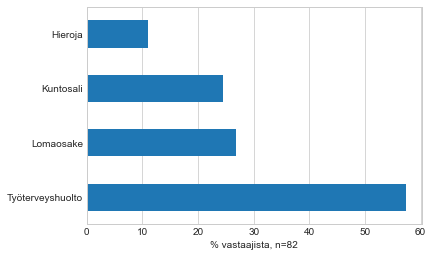

In [5]:
# Vaakapylväskaavio
ax1 = df1['% vastaajista'].plot.barh()

# x-akselin otsikko
ax1.set_xlabel('% vastaajista, n=' + str(n))

# Poistan vaakasuuntaisen taustaviivoituksen
ax1.grid(axis = 'y')